# ATSC 528 Homework 2: Successive Corrections  
Author: Brian T. Horan  
Created: 10/17/2022  
Assignment: ATSC 528 HW 2  
Purpose: To read in upper air observations and plot them on a polar stereographic projection using successive corrections. The data is read in using pandas. The grid is created with np.meshgrid, and the Lats/Lons from the observations are converted to x and y coordinates, in CM, to analyze using relative radius of influence. The dmin is calculated using the relative radius and found with numpy functions. The Cressman weight function is implemented in a function which calculates each obs weight for the roi.  
# FINISH THIS

In [2]:
### Import Required Modules (shouldn't need to change) ###
import numpy as np                 #numpy for math
import matplotlib.pyplot as plt    #matplotlib for plotting
import cartopy.crs as ccrs         #cartopy for plotting on map
import cartopy.feature as cfeature #cartopy basic shapefiles
import pandas as pd                #Pandas for opening file

In [84]:
def calc_dmin(x_obs, y_obs):
    min_rois = np.empty((135))
    for i in range(len(x_obs)):
        rel_x = x_obs[i] - x_obs
        rel_y = y_obs[i] - y_obs
        rel_rad = (rel_x **2 + rel_y **2)**0.5
        rel_rad = np.delete(rel_rad, i)
        min_rois[i] = np.amin(rel_rad)
    return np.mean(min_rois)

In [75]:
### Create function for Cressman Analysis ###
def cressman():
    """
    Function to analyze the value at a given point from other data
    using a Cressman analysis technique.
    """
    
    return #Should return cressman weights for each place in the 

In [76]:
### Create function for bilinear interpolation ###


In [77]:
### Read in observations ###
ds = pd.read_csv('./RAOBs_201903131200.txt', names = ['Station', 'Lat', 'Lon', 'Height', 'Wind_dir', 'Wind_spd'])
lons = ds['Lon']
lats = ds['Lat']
hgts_500 = ds['Height']

In [78]:
### Set up analysis map with a 22x28 rectangular grid of points ###
#The analysis grid is the same as the one for homework 1, so I will recycle this code here.
x_o = 18.90
y_o = -6.3
del_x = 1.27
del_y = 1.27
x_n = 22
y_n = 28


x_grid = np.arange(start = x_o, stop = (x_o+x_n*del_x) - 1, step=del_x)
y_grid = np.arange(start = y_o, stop = (y_o+y_n*del_y) - 1, step=del_y)
xs, ys = np.meshgrid(x_grid, y_grid)

In [79]:
### convert obs lat/long to x,y ###
rho = 6371 * 1e5
psi_0 = 60 * (np.pi/180)
map_proj = 1/(15e6)
lambda_not = -115

LATS_grid = (180/np.pi) * ((np.pi/2) - (2*np.arctan((np.sqrt((xs/map_proj)**2 + (ys/map_proj)**2))/(rho*(1+np.sin(psi_0)))))) 
LONS_grid = np.arctan(ys/xs) * (180/np.pi) + lambda_not

In [85]:
sigma = (1+np.sin(psi_0))/(1+np.sin((lats*(np.pi/180))))
r = rho * sigma * np.cos(lats*((np.pi/180))) * map_proj
y_observed = r*np.sin((lons*(np.pi/180))-lambda_not * (np.pi/180))
x_observed = r*np.cos(((lons*(np.pi/180)) - (lambda_not*(np.pi/180))))

In [87]:
### Perform 500mb geopotential height analyses using a Cressman weighting Function###
#Use radii of influence 4, 2.5, 1.5 *dmin
dmin = calc_dmin(x_observed.values, y_observed.values)
print(dmin)
rois = np.array([4, 2.5, 1.5]) * dmin

2.5548700820071426


array([10.21948033,  6.38717521,  3.83230512])

In [ ]:
### First analysis, no successive corrections ###
#eq = F1A(ri) = sum(weight * obs)/sum(weights)


In [ ]:
### Next Analyses ###

In [ ]:
### Calculate Analysis Differences


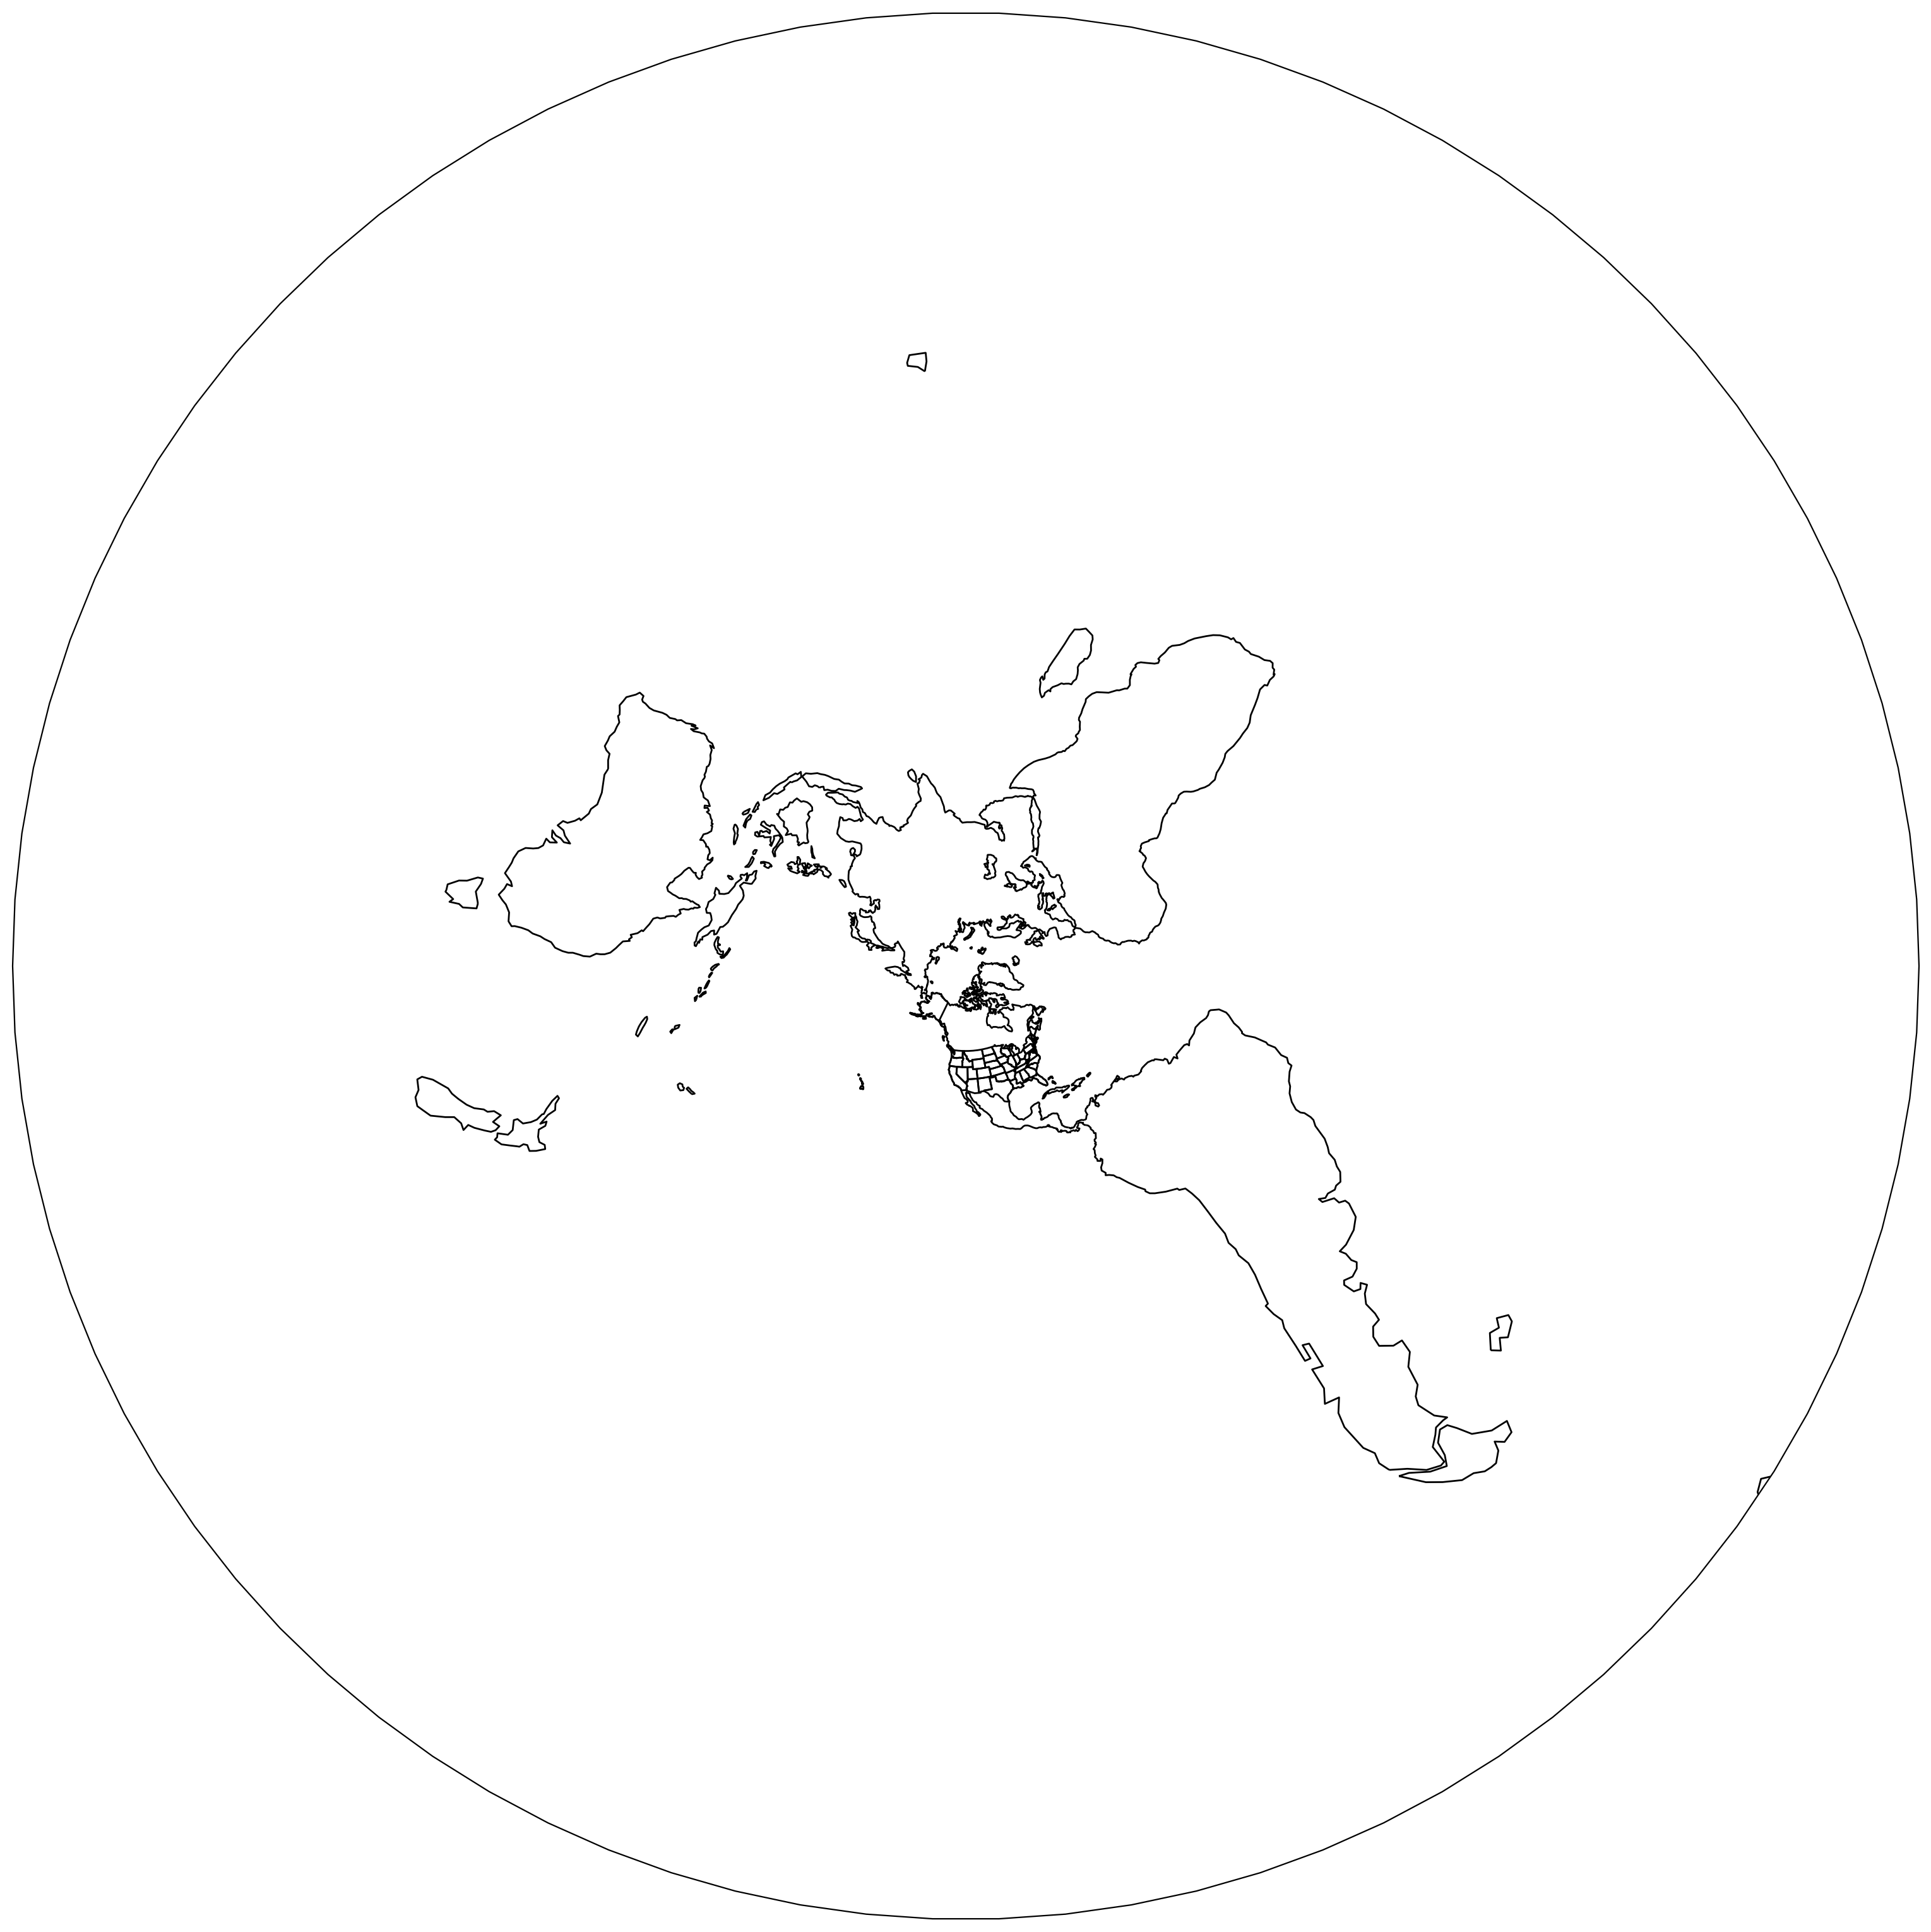

In [10]:
### Plot 500mb analyses over a map ###
#use old code...
fig = plt.figure(figsize = (20,20), dpi = 200)
proj = ccrs.Stereographic(central_longitude=-115, central_latitude=90, true_scale_latitude = 60)
ax1 = plt.subplot(111, projection = proj)
ax1.add_feature(cfeature.STATES)
ax1.add_feature(cfeature.COASTLINE)


C:\Users\Brian\.conda\envs\research\lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
C:\Users\Brian\.conda\envs\research\lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


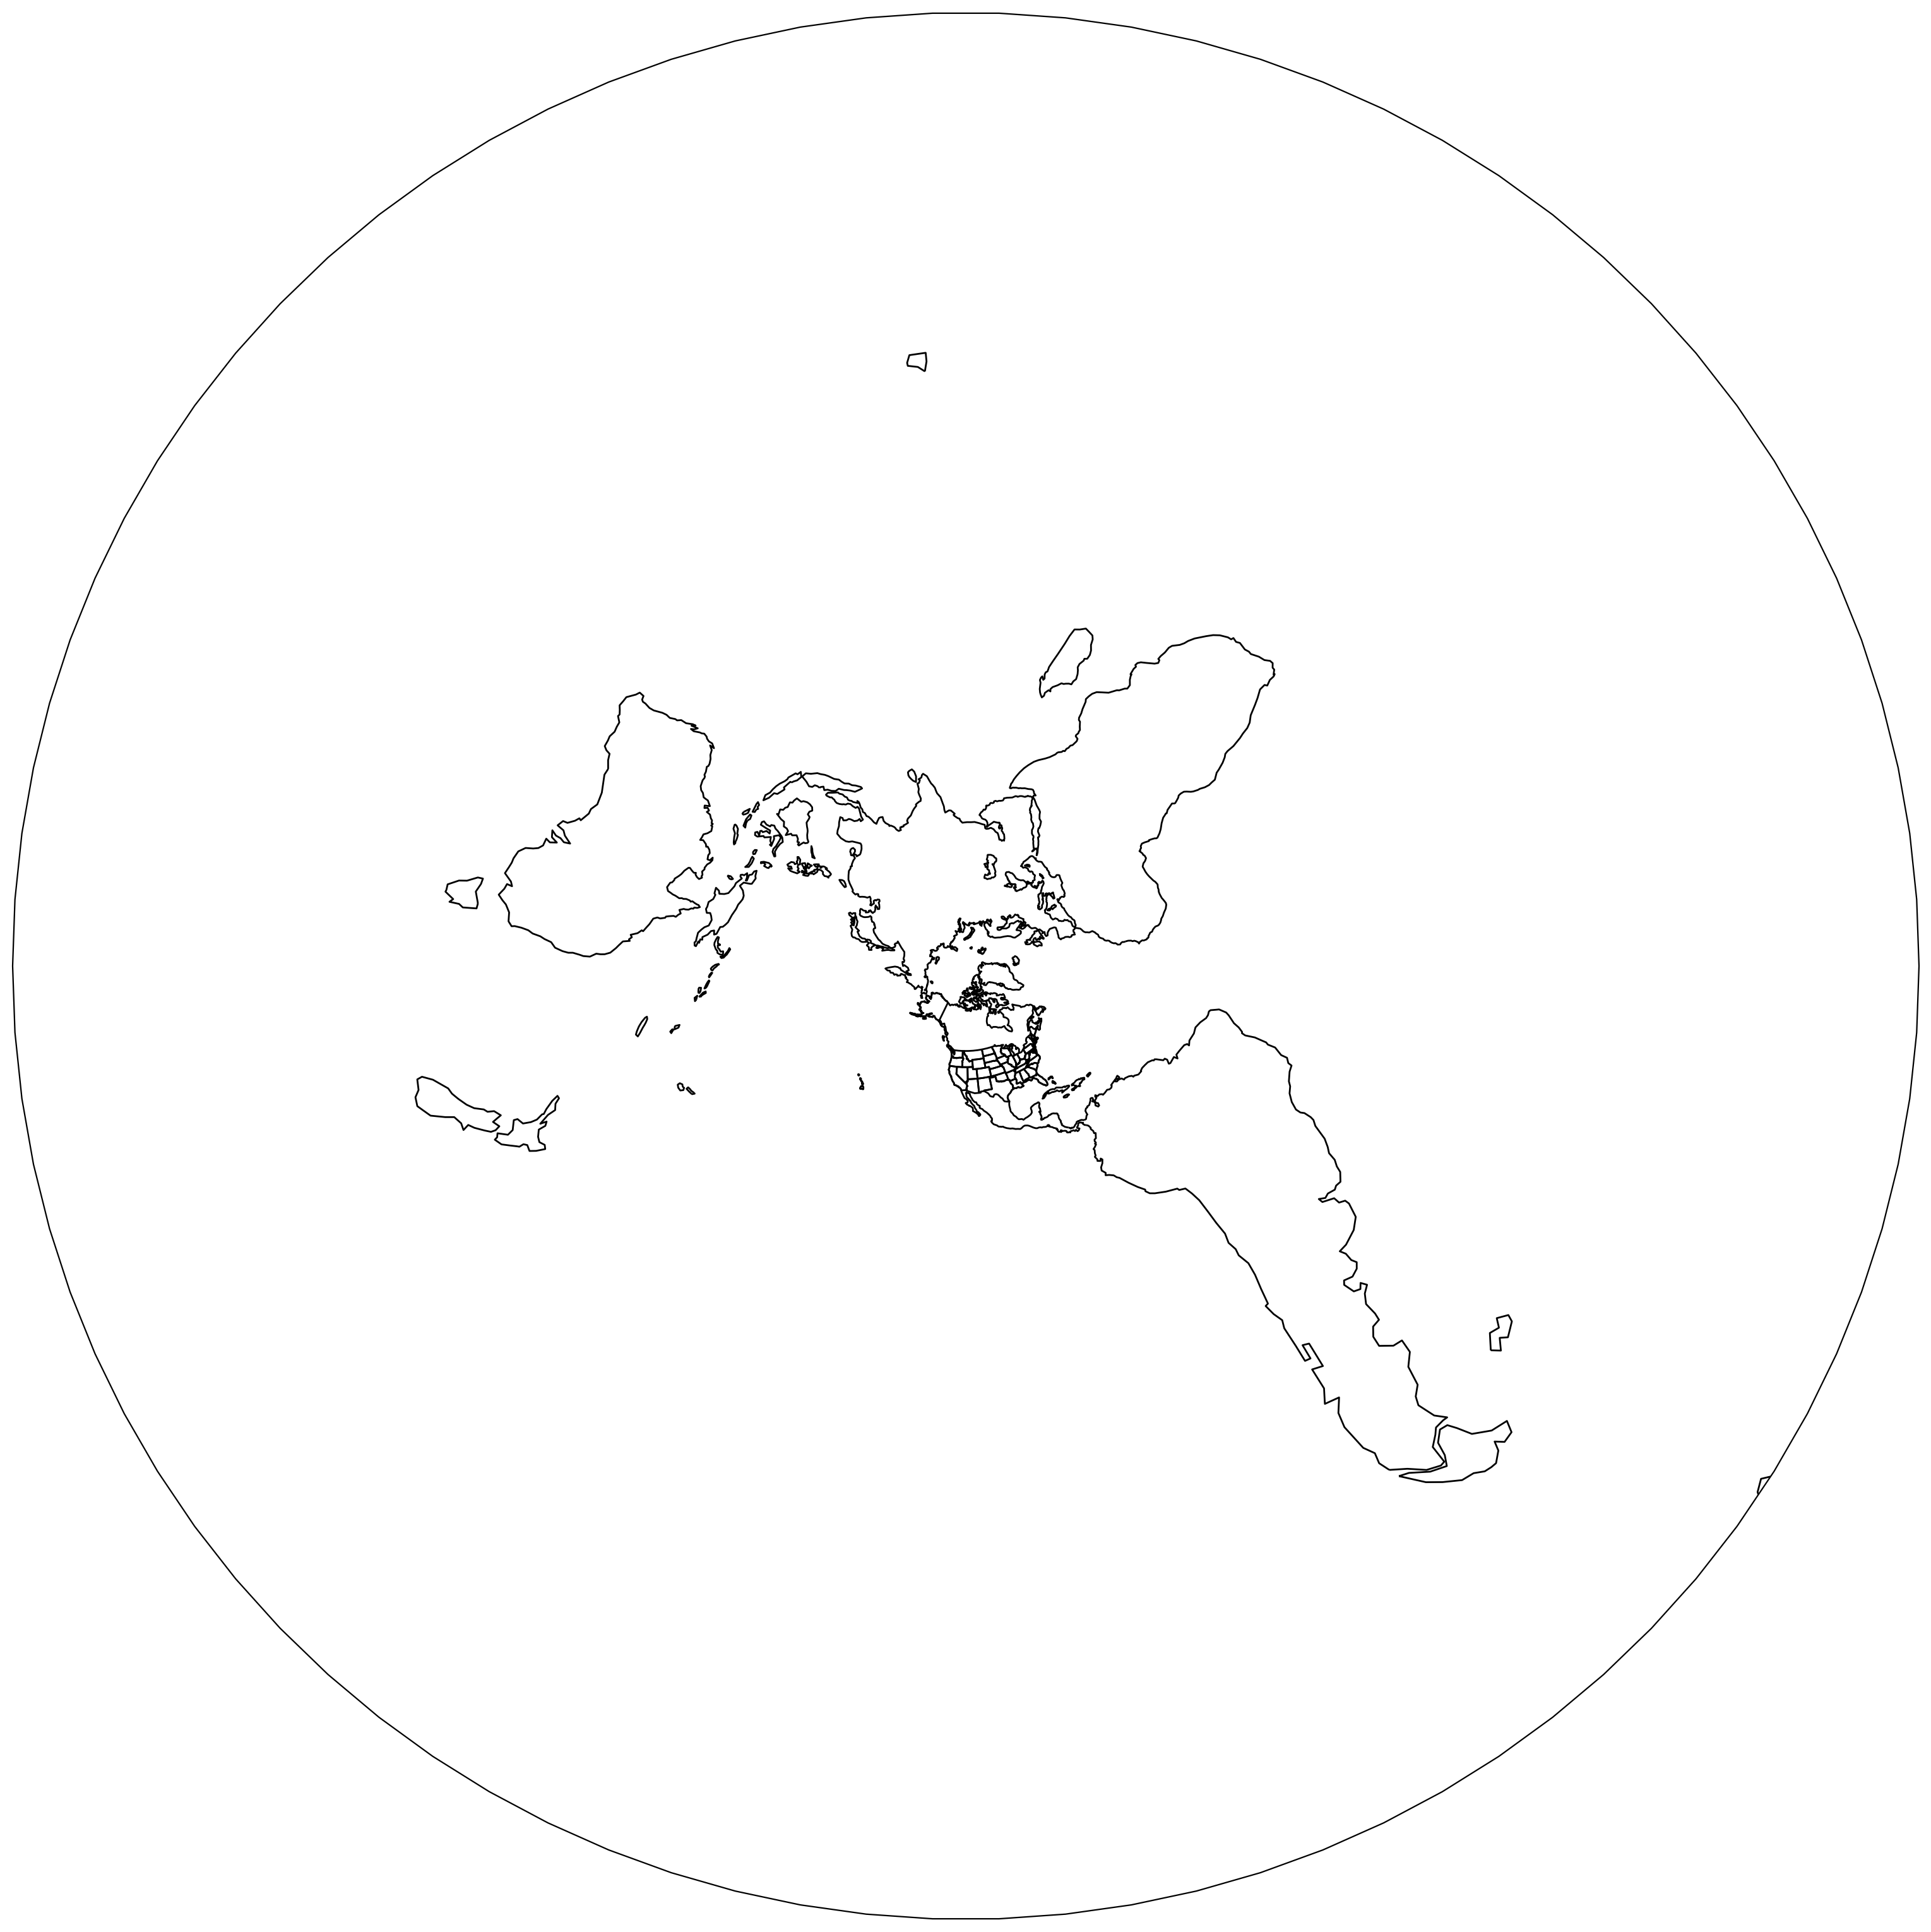

In [9]:
### Plot Analysis Differences ###
fig = plt.figure(figsize = (20,20),dpi = 200)
proj = ccrs.Stereographic(central_longitude=-115, central_latitude=90, true_scale_latitude = 60)
ax1 = plt.subplot(111, projection = proj)
ax1.add_feature(cfeature.STATES)
ax1.add_feature(cfeature.COASTLINE)


In [ ]:
### Store the analyses in text files ###
with open() as f:
    #store some stuff here

In [ ]:
### Store the difference fields in text files ###
with open() as f1:

In [ ]:
### Store RMS values in text file ###
with open() as f2:

In [ ]:
### In a separte text file (or below), answer the following questions ###
'''
1 - Describe the general features that you see in your contoured analyses.
    

2 - Describe the differences that you see in your contoured analyses.  
    Does one analysis seem to be smoother than the other?  If so, what would cause this?
    

3 - What happens as you increase the number of successive correction passes?  Is this 
    desirable?  Why or why not?
    

'''